In [49]:
import os
import tensorflow as tf
from tensorflow import *
from sklearn.neural_network import MLPClassifier
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [50]:
dataset_dir = "images/train"
test_dir = "images/test"
img_height, img_width = 28, 28

physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [51]:
def load_and_preprocess_image(file_path):
    img = Image.open(file_path).convert('L')  # 'L' mode for grayscale
    img = img.resize((img_height, img_width))
    img_array = np.array(img) / 255.0
    return img_array

In [52]:
train_images = []
train_labels = []

for filename in os.listdir(dataset_dir):
    if filename.endswith(".jpg"):
        img_path = os.path.join(dataset_dir, filename)
        img_array = load_and_preprocess_image(img_path)
        train_images.append(img_array)
        label = int(filename.split("_")[0])  # Extract the label from the filename
        train_labels.append(label)

In [53]:
test_images = []
test_labels = []

for filename in os.listdir(test_dir):
    if filename.endswith(".jpg"):
        label = int(filename.split("_")[0])  # Extract the label from the filename
        test_labels.append(label)
        img_path = os.path.join(test_dir, filename)
        img_array = load_and_preprocess_image(img_path)
        test_images.append(img_array)

In [54]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)


In [55]:
#X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
#kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#train_images = train_images.reshape(train_images.shape[0], -1)
#test_images = test_images.reshape(test_images.shape[0], -1)

Accuracy: 94.27%


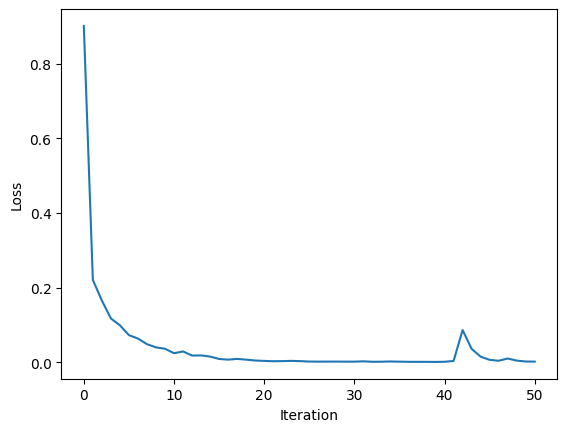

In [56]:
X_train_flattened = train_images.reshape(train_images.shape[0], -1)
X_test_flattened = test_images.reshape(test_images.shape[0], -1)



number_of_iteration = 1000
hidden_layer = (200, 100, 80,40)

# Build and train your model
trained_network = MLPClassifier(hidden_layer_sizes=hidden_layer, max_iter=number_of_iteration, random_state=1, shuffle=True).fit(X_train_flattened, train_labels)

# Evaluate the model on the test set
y_result = trained_network.predict(X_test_flattened)

# Print the accuracy
accuracy = (y_result == test_labels).mean() * 100
print(f"Accuracy: {accuracy:.2f}%")

# Plot accuracy during training
plt.plot(trained_network.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()




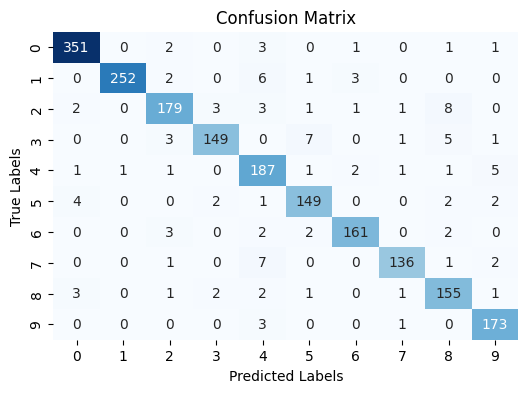

In [57]:
import seaborn as sns

cm = confusion_matrix(test_labels, y_result)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()